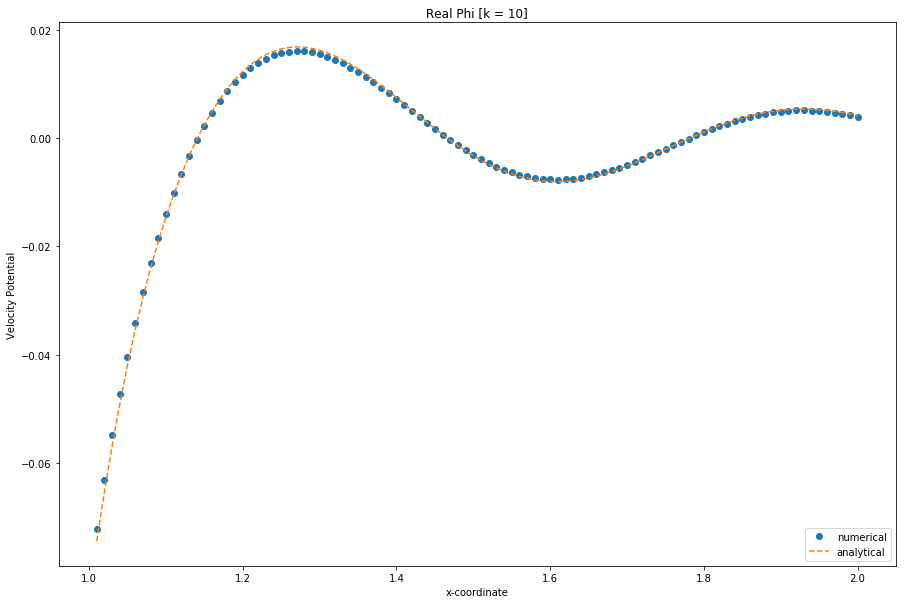

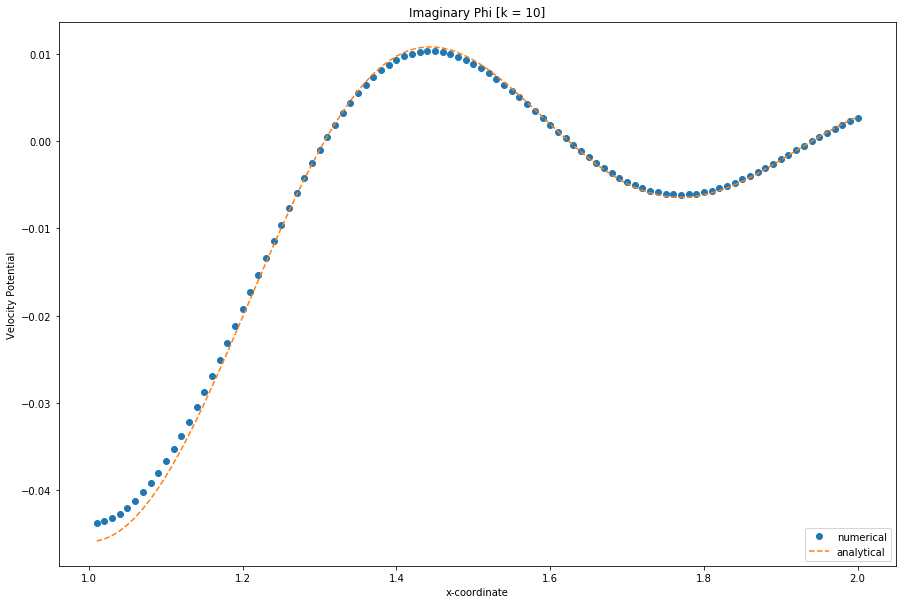

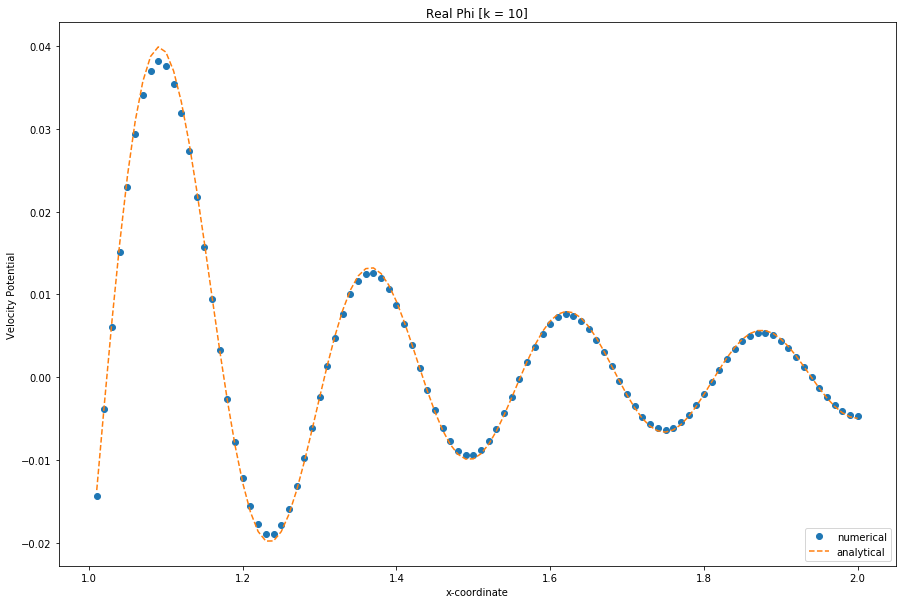

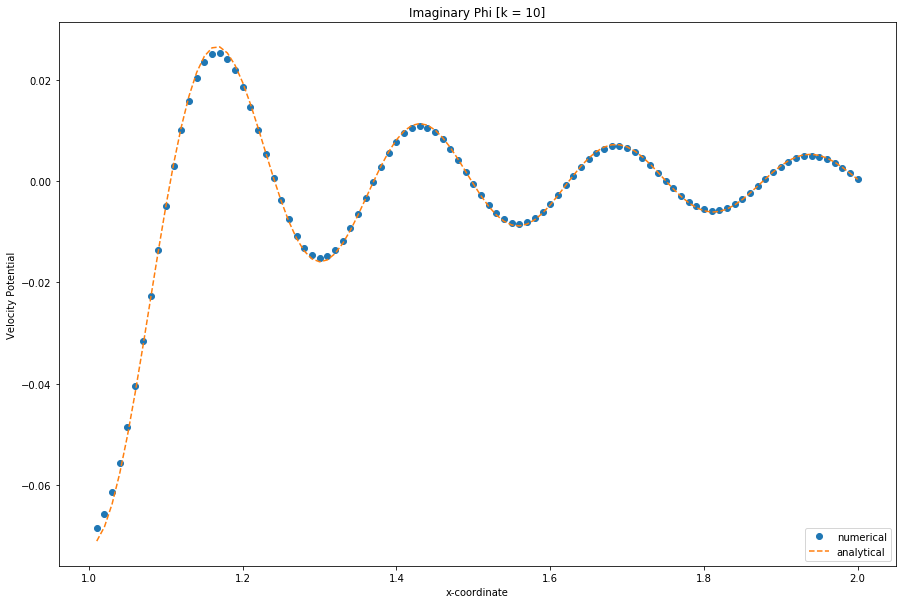

In [1]:
import numpy as np
from ExampleBoundaries import Disk3D
from AcousticProperties import *
from RayleighSolver import *

import matplotlib.pyplot as plt
%matplotlib inline

def plotVelocityPotential(title, x, bem, ana):
    plt.rcParams['figure.figsize'] = [15, 10]
    plt.title(title)
    BEM, = plt.plot(x, bem, 'o',  label = 'numerical')
    ANA, = plt.plot(x, ana, '--', label = 'analytical')
    plt.xlabel('x-coordinate')
    plt.ylabel('Velocity Potential')
    plt.legend(handles=[BEM, ANA], loc = 'lower right')
    plt.show()

def analyticalPhi(k, density, c, V, r, x):
    y = np.subtract(x, 1.0)
    const = -1j * V / k
    variable = np.exp(np.multiply(1j * k, y)) - np.exp(1j * k * np.sqrt(np.square(r) + np.square(y)))
    return const * variable

def numericalPhi(k, V, mesh, samples):
    solver = RayleighSolver3D(mesh)
    boundaryCondition = solver.neumannBoundaryCondition()
    boundaryCondition.f.fill(V)

    boundarysolution = solver.solveBoundary(k, boundaryCondition)
    return boundarysolution.solveSamples(samples)

exteriorPoints = np.zeros((100, 3), dtype=np.float32)
exteriorPoints[:,0] = np.linspace(1.01, 2.0, num=100)


# Test Problem 1

k = 10.0 # Wavenumber
frequency = wavenumberToFrequency(k)
V = 1.0 # piston velocity
c = 344.0
density = 1.205

numPhi = numericalPhi(k, V, Disk3D(), exteriorPoints)

x = exteriorPoints[:, 0]
anaPhi = analyticalPhi(k, density, c, V, 0.1, x)

plotVelocityPotential('Real Phi [k = 10]',      x, numPhi.real, anaPhi.real)
plotVelocityPotential('Imaginary Phi [k = 10]', x, numPhi.imag, anaPhi.imag)


# Test Problem 2

k = 25.0 # Wavenumber
frequency = wavenumberToFrequency(k)

numPhi = numericalPhi(k, V, Disk3D(), exteriorPoints)

x = exteriorPoints[:, 0]
anaPhi = analyticalPhi(k, density, c, V, 0.1, x)

plotVelocityPotential('Real Phi [k = 10]',      x, numPhi.real, anaPhi.real)
plotVelocityPotential('Imaginary Phi [k = 10]', x, numPhi.imag, anaPhi.imag)
